# Thiết lập môi trường tổng

In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.pardir))

# Thêm đường dẫn gốc vào sys.path
if project_root not in sys.path:
    sys.path.append(project_root)

# Kiểm tra xem đã nhận chưa
print(f"Project Root: {project_root}")

Project Root: d:\University\HK7\IT_Project\Project\Source


# Khai báo các thư viện / module cần thiết

In [3]:
import pandas as pd

from utils.config import *
from utils.supporter import *

from data.datasets import *
from data.loader import get_data_loader

from engine.trainer import Trainer
from engine.evaluator import *

# Thiết lập cấu hình

## Cấu hình cho các mô hình

In [4]:
spatial_cfg = TrainingConfig('spatial', 'efficientnet')

freq_cfg = TrainingConfig('frequency', 'frequency')
freq_cfg.FREEZE_EPOCHS = 0

hybrid_cfg = TrainingConfig('hybrid', 'efficientnet_fft')

## Thiết lập seed

In [5]:
set_seed(spatial_cfg.RANDOM_SEED, deterministic=False)

[INFO] Random seed set to 42 | deterministic=False


# Tải dữ liệu

In [6]:
# Load data
train_df = pd.read_csv(PathConfig.train_csv)
val_df = pd.read_csv(PathConfig.val_csv)
test_df = pd.read_csv(PathConfig.test_csv)

# Display first few rows of training data
print("Training Data Sample:")
train_df.head()

print("Number of training samples:", len(train_df))
print("Number of validation samples:", len(val_df))
print("Number of test samples:", len(test_df))

Training Data Sample:
Number of training samples: 13866
Number of validation samples: 1981
Number of test samples: 3962


# Khởi tạo Dataset và Data Loader

## Dataset

In [7]:
transforms_dict = get_transforms()

train_dataset = DeepFakeDataset(train_df, transform=transforms_dict['train'])
val_dataset = DeepFakeDataset(val_df, transform=transforms_dict['val'])
test_dataset = DeepFakeDataset(test_df, transform=transforms_dict['test'])

## Data Loader

In [8]:
train_loader = get_data_loader(train_dataset, hybrid_cfg, True)
val_loader = get_data_loader(val_dataset, hybrid_cfg, False)
test_loader = get_data_loader(test_dataset, hybrid_cfg, False)

print("DataLoader đã được tạo thành công!")
print(f"Số batch trong tập train: {len(train_loader)}")
print(f"Số batch trong tập val: {len(val_loader)}")
print(f"Số batch trong tập test: {len(test_loader)}")

DataLoader đã được tạo thành công!
Số batch trong tập train: 867
Số batch trong tập val: 124
Số batch trong tập test: 248


## Test 1 batch của Data Loader

In [9]:
for images, labels in train_loader:
    print(f"Kích thước batch ảnh: {images.size()}")
    print(f"Kích thước batch nhãn: {labels.size()}")
    break  # Chỉ kiểm tra batch đầu tiên

Kích thước batch ảnh: torch.Size([16, 3, 240, 240])
Kích thước batch nhãn: torch.Size([16])


# Huấn luyện mô hình - Training

## Mô hình không gian

Huấn luyện dựa trên đặc trưng không gian (spatial feature) -> EfficientNet - B0

### Khởi tạo mô hình

In [10]:
spatial_model = build_model(spatial_cfg)

spatial_trainer = Trainer(
    spatial_model, train_loader, val_loader, spatial_cfg
)

🛠️ Building Model | Mode: spatial | Device: cuda


### Training

In [11]:
spatial_trainer.train() 


STARTING TRAINING | Mode: spatial

Epoch 1/10
[INFO] Freezing backbone at epoch 0
== Spatial Branch is now Frozen.


Validating: 100%|██████████| 124/124 [00:19<00:00,  6.39it/s]



Epoch 1/10 Summary
Train | Loss: 0.2937 | Acc: 0.8747 | F1: 0.8717
Val   | Loss: 0.1557 | Acc: 0.9369
      | Precision: 0.9954 | Recall: 0.8767 | F1: 0.9322
LR    | 0.000010
   New Best Val Acc: 0.9369
== Best model saved.

Epoch 2/10


Validating: 100%|██████████| 124/124 [00:14<00:00,  8.59it/s]



Epoch 2/10 Summary
Train | Loss: 0.2290 | Acc: 0.9043 | F1: 0.9030
Val   | Loss: 0.1684 | Acc: 0.9359
      | Precision: 1.0000 | Recall: 0.8705 | F1: 0.9308
LR    | 0.000010
   Epochs no improve: 1/10

Epoch 3/10


Validating: 100%|██████████| 124/124 [00:14<00:00,  8.77it/s]



Epoch 3/10 Summary
Train | Loss: 0.1998 | Acc: 0.9177 | F1: 0.9168
Val   | Loss: 0.1270 | Acc: 0.9520
      | Precision: 0.9989 | Recall: 0.9042 | F1: 0.9492
LR    | 0.000010
   New Best Val Acc: 0.9520
== Best model saved.

Epoch 4/10
[INFO] Unfreezing backbone at epoch 3
== Spatial Branch is now Unfrozen.


Validating: 100%|██████████| 124/124 [00:21<00:00,  5.81it/s]



Epoch 4/10 Summary
Train | Loss: 0.1562 | Acc: 0.9399 | F1: 0.9390
Val   | Loss: 0.0919 | Acc: 0.9647
      | Precision: 1.0000 | Recall: 0.9286 | F1: 0.9630
LR    | 0.000010
   New Best Val Acc: 0.9647
== Best model saved.

Epoch 5/10


Validating: 100%|██████████| 124/124 [00:15<00:00,  8.26it/s]



Epoch 5/10 Summary
Train | Loss: 0.1097 | Acc: 0.9593 | F1: 0.9588
Val   | Loss: 0.0698 | Acc: 0.9748
      | Precision: 1.0000 | Recall: 0.9490 | F1: 0.9738
LR    | 0.000010
   New Best Val Acc: 0.9748
== Best model saved.

Epoch 6/10


Validating: 100%|██████████| 124/124 [00:13<00:00,  8.88it/s]



Epoch 6/10 Summary
Train | Loss: 0.0883 | Acc: 0.9691 | F1: 0.9687
Val   | Loss: 0.0557 | Acc: 0.9788
      | Precision: 1.0000 | Recall: 0.9572 | F1: 0.9781
LR    | 0.000010
   New Best Val Acc: 0.9788
== Best model saved.

Epoch 7/10


Validating: 100%|██████████| 124/124 [00:13<00:00,  8.92it/s]



Epoch 7/10 Summary
Train | Loss: 0.0720 | Acc: 0.9740 | F1: 0.9737
Val   | Loss: 0.0539 | Acc: 0.9813
      | Precision: 1.0000 | Recall: 0.9623 | F1: 0.9808
LR    | 0.000010
   New Best Val Acc: 0.9813
== Best model saved.

Epoch 8/10


Validating: 100%|██████████| 124/124 [00:13<00:00,  8.86it/s]



Epoch 8/10 Summary
Train | Loss: 0.0659 | Acc: 0.9770 | F1: 0.9768
Val   | Loss: 0.0444 | Acc: 0.9838
      | Precision: 1.0000 | Recall: 0.9674 | F1: 0.9834
LR    | 0.000009
   New Best Val Acc: 0.9838
== Best model saved.

Epoch 9/10


Validating: 100%|██████████| 124/124 [00:14<00:00,  8.84it/s]



Epoch 9/10 Summary
Train | Loss: 0.0622 | Acc: 0.9796 | F1: 0.9794
Val   | Loss: 0.0271 | Acc: 0.9899
      | Precision: 0.9990 | Recall: 0.9806 | F1: 0.9897
LR    | 0.000009
   New Best Val Acc: 0.9899
== Best model saved.

Epoch 10/10


Validating: 100%|██████████| 124/124 [00:13<00:00,  9.10it/s]



Epoch 10/10 Summary
Train | Loss: 0.0502 | Acc: 0.9834 | F1: 0.9832
Val   | Loss: 0.0710 | Acc: 0.9783
      | Precision: 1.0000 | Recall: 0.9562 | F1: 0.9776
LR    | 0.000009
   Epochs no improve: 1/10

Training Completed. Best Acc: 0.9899
History saved to: ..\..\Outputs\efficientnet\logs\training_history.json


### Trực quan kết quả huấn luyện

📈 Đã lưu biểu đồ training tại: ..\..\Outputs\efficientnet\logs\training_history.png


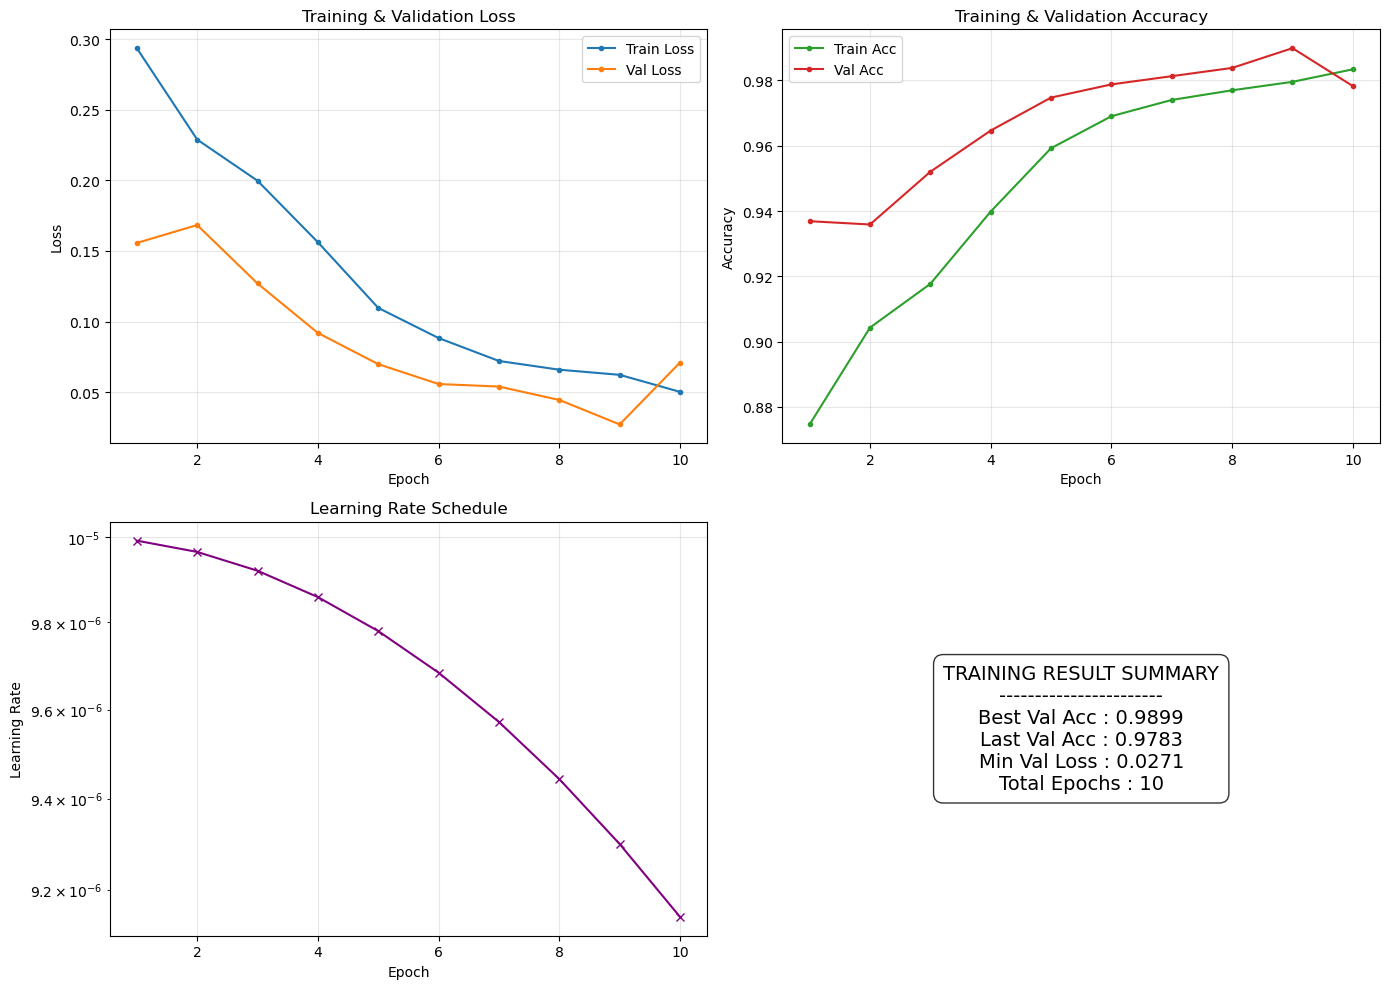

In [12]:
plot_training_history(spatial_trainer.history, spatial_cfg.LOG_DIR)

📊 Đã lưu biểu đồ Validation Metrics tại: ..\..\Outputs\efficientnet\logs\validation_metrics.png


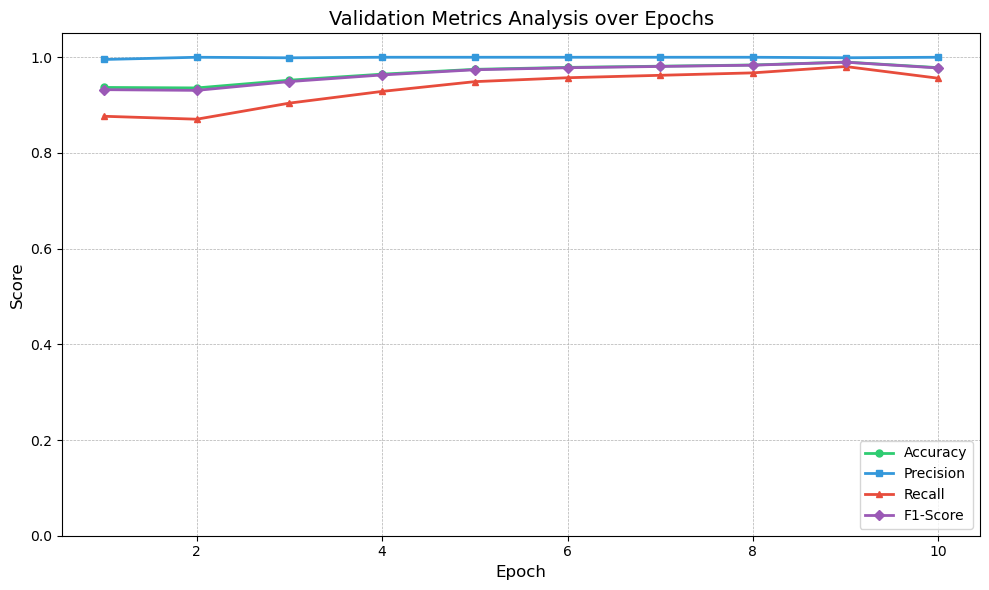

In [13]:
plot_validation_metrics(spatial_trainer.history, spatial_cfg.LOG_DIR)

### Đánh giá mô hình - Evaluate


BẮT ĐẦU ĐÁNH GIÁ TRÊN TẬP TEST


Testing: 100%|██████████| 248/248 [01:16<00:00,  3.25it/s]



📊 KẾT QUẢ ĐÁNH GIÁ:
   Accuracy : 0.9740
   Precision: 0.9995
   Recall   : 0.9480
   F1 Score : 0.9731

📋 Chi tiết theo lớp:
              precision    recall  f1-score   support

        Real       0.95      1.00      0.97      2000
        Fake       1.00      0.95      0.97      1962

    accuracy                           0.97      3962
   macro avg       0.98      0.97      0.97      3962
weighted avg       0.98      0.97      0.97      3962

🔢 Đã lưu Confusion Matrix tại: ..\..\Outputs\efficientnet\logs\evaluation_results\confusion_matrix.png


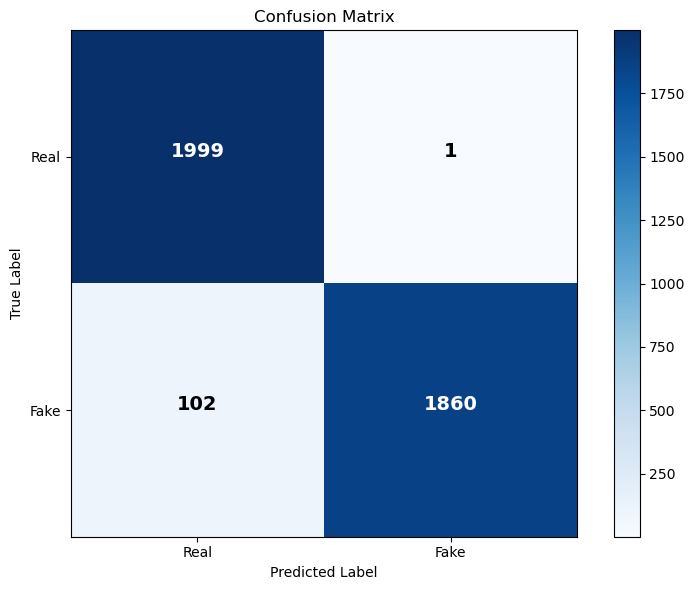

📉 Đã lưu ROC Curve tại: ..\..\Outputs\efficientnet\logs\evaluation_results\roc_curve.png


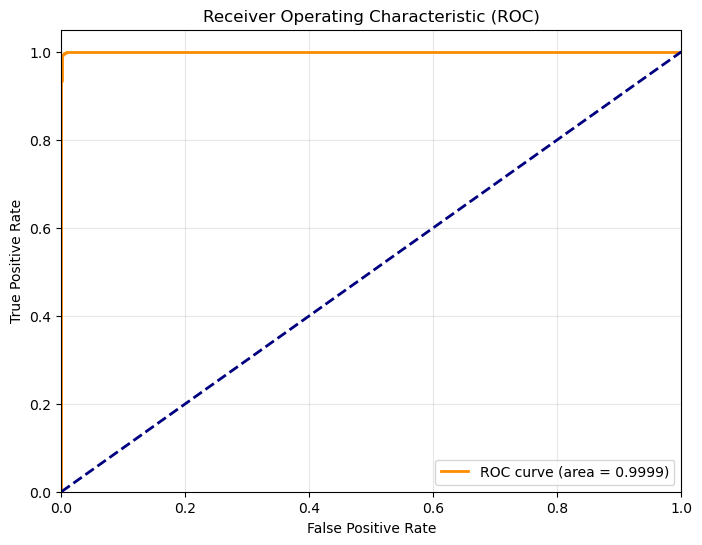

=== ROC AUC Score: 0.9999

Đã lưu toàn bộ kết quả đánh giá tại: ..\..\Outputs\efficientnet\logs\evaluation_results


In [14]:
evaluate_test_set(spatial_model, test_loader, spatial_cfg.DEVICE, spatial_cfg.LOG_DIR)

## Mô hình tần số 

Phân tích miền tần số - FFT

### Khởi tạo mô hình

In [15]:
freq_model = build_model(freq_cfg)
freq_trainer = Trainer(
    freq_model, train_loader, val_loader, freq_cfg
)

🛠️ Building Model | Mode: frequency | Device: cuda


### Training

In [16]:
freq_trainer.train()


STARTING TRAINING | Mode: frequency

Epoch 1/10


Validating: 100%|██████████| 124/124 [00:12<00:00,  9.94it/s]



Epoch 1/10 Summary
Train | Loss: 0.4116 | Acc: 0.8178 | F1: 0.8142
Val   | Loss: 0.5471 | Acc: 0.7673
      | Precision: 0.9981 | Recall: 0.5311 | F1: 0.6933
LR    | 0.000100
   New Best Val Acc: 0.7673
== Best model saved.

Epoch 2/10


Validating: 100%|██████████| 124/124 [00:13<00:00,  9.33it/s]



Epoch 2/10 Summary
Train | Loss: 0.3562 | Acc: 0.8446 | F1: 0.8428
Val   | Loss: 0.8741 | Acc: 0.7017
      | Precision: 1.0000 | Recall: 0.3976 | F1: 0.5689
LR    | 0.000100
   Epochs no improve: 1/10

Epoch 3/10


Validating: 100%|██████████| 124/124 [00:15<00:00,  7.92it/s]



Epoch 3/10 Summary
Train | Loss: 0.3265 | Acc: 0.8591 | F1: 0.8574
Val   | Loss: 0.3903 | Acc: 0.8193
      | Precision: 0.9875 | Recall: 0.6432 | F1: 0.7790
LR    | 0.000099
   New Best Val Acc: 0.8193
== Best model saved.

Epoch 4/10


Validating: 100%|██████████| 124/124 [00:13<00:00,  8.99it/s]



Epoch 4/10 Summary
Train | Loss: 0.3065 | Acc: 0.8719 | F1: 0.8695
Val   | Loss: 0.3789 | Acc: 0.8269
      | Precision: 0.9908 | Recall: 0.6565 | F1: 0.7897
LR    | 0.000098
   New Best Val Acc: 0.8269
== Best model saved.

Epoch 5/10


Validating: 100%|██████████| 124/124 [00:13<00:00,  9.12it/s]



Epoch 5/10 Summary
Train | Loss: 0.3004 | Acc: 0.8762 | F1: 0.8741
Val   | Loss: 0.3941 | Acc: 0.8183
      | Precision: 0.9936 | Recall: 0.6371 | F1: 0.7764
LR    | 0.000098
   Epochs no improve: 1/10

Epoch 6/10


Validating: 100%|██████████| 124/124 [00:13<00:00,  9.37it/s]



Epoch 6/10 Summary
Train | Loss: 0.2949 | Acc: 0.8812 | F1: 0.8789
Val   | Loss: 0.7728 | Acc: 0.6896
      | Precision: 0.9973 | Recall: 0.3741 | F1: 0.5441
LR    | 0.000097
   Epochs no improve: 2/10

Epoch 7/10


Validating: 100%|██████████| 124/124 [00:13<00:00,  9.35it/s]



Epoch 7/10 Summary
Train | Loss: 0.2855 | Acc: 0.8824 | F1: 0.8801
Val   | Loss: 1.0826 | Acc: 0.6522
      | Precision: 1.0000 | Recall: 0.2977 | F1: 0.4588
LR    | 0.000095
   Epochs no improve: 3/10

Epoch 8/10


Validating: 100%|██████████| 124/124 [00:13<00:00,  9.50it/s]



Epoch 8/10 Summary
Train | Loss: 0.2752 | Acc: 0.8871 | F1: 0.8846
Val   | Loss: 0.6794 | Acc: 0.7405
      | Precision: 1.0000 | Recall: 0.4760 | F1: 0.6450
LR    | 0.000094
   Epochs no improve: 4/10

Epoch 9/10


Validating: 100%|██████████| 124/124 [00:13<00:00,  9.49it/s]



Epoch 9/10 Summary
Train | Loss: 0.2728 | Acc: 0.8876 | F1: 0.8860
Val   | Loss: 0.3058 | Acc: 0.8819
      | Precision: 0.9269 | Recall: 0.8267 | F1: 0.8739
LR    | 0.000092
   New Best Val Acc: 0.8819
== Best model saved.

Epoch 10/10


Validating: 100%|██████████| 124/124 [00:13<00:00,  9.35it/s]


Epoch 10/10 Summary
Train | Loss: 0.2713 | Acc: 0.8892 | F1: 0.8871
Val   | Loss: 0.4120 | Acc: 0.8117
      | Precision: 0.9951 | Recall: 0.6228 | F1: 0.7661
LR    | 0.000091
   Epochs no improve: 1/10

Training Completed. Best Acc: 0.8819
History saved to: ..\..\Outputs\frequency\logs\training_history.json


### Trực quan quá trình huấn luyện  

📈 Đã lưu biểu đồ training tại: ..\..\Outputs\frequency\logs\training_history.png


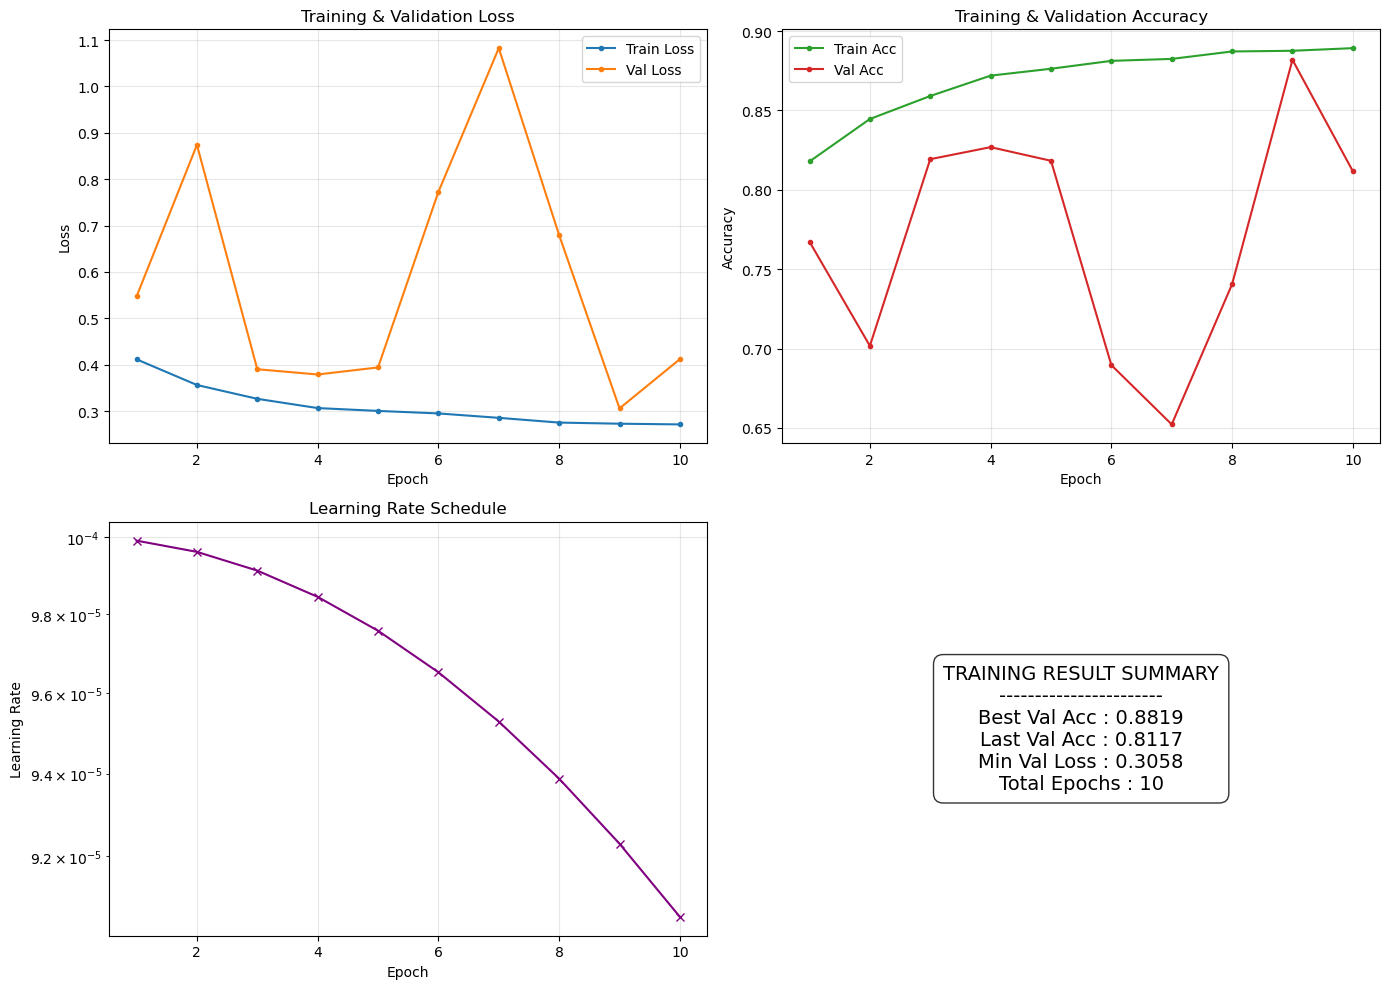

In [19]:
plot_training_history(freq_trainer.history, freq_cfg.LOG_DIR)

### Đánh giá mô hình - Evaluate


BẮT ĐẦU ĐÁNH GIÁ TRÊN TẬP TEST


Testing: 100%|██████████| 248/248 [00:26<00:00,  9.34it/s]



📊 KẾT QUẢ ĐÁNH GIÁ:
   Accuracy : 0.8026
   Precision: 0.9966
   Recall   : 0.6035
   F1 Score : 0.7517

📋 Chi tiết theo lớp:
              precision    recall  f1-score   support

        Real       0.72      1.00      0.84      2000
        Fake       1.00      0.60      0.75      1962

    accuracy                           0.80      3962
   macro avg       0.86      0.80      0.79      3962
weighted avg       0.86      0.80      0.79      3962

🔢 Đã lưu Confusion Matrix tại: ..\..\Outputs\frequency\logs\evaluation_results\confusion_matrix.png


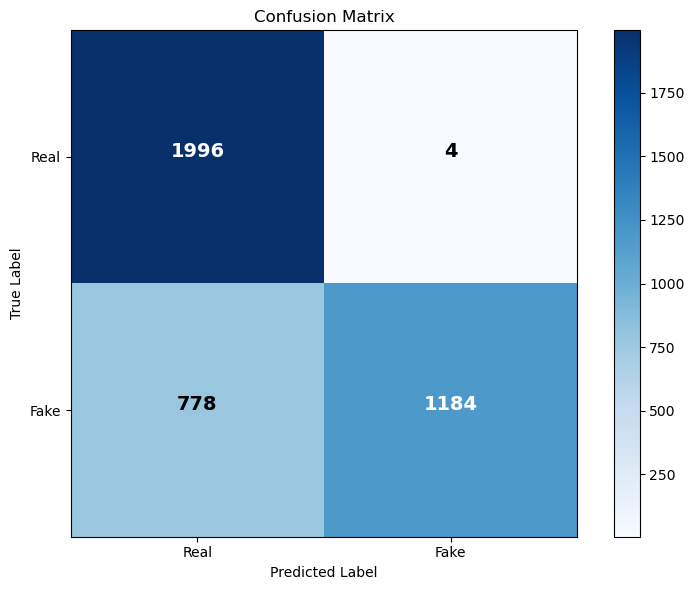

📉 Đã lưu ROC Curve tại: ..\..\Outputs\frequency\logs\evaluation_results\roc_curve.png


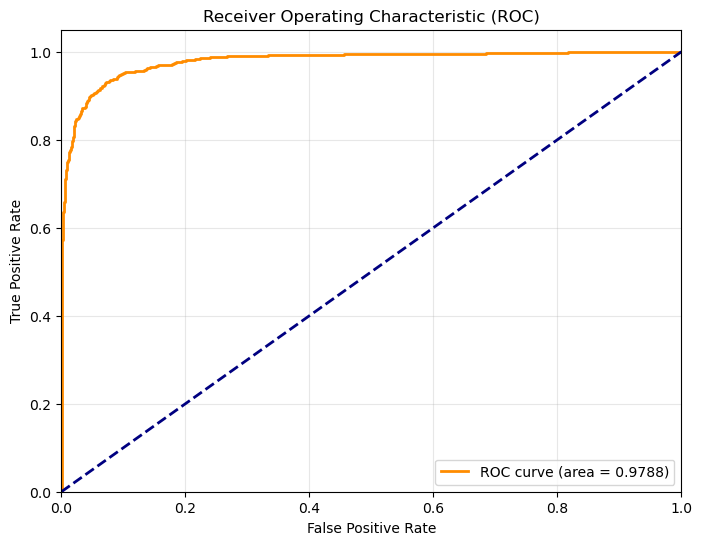

=== ROC AUC Score: 0.9788

Đã lưu toàn bộ kết quả đánh giá tại: ..\..\Outputs\frequency\logs\evaluation_results


In [18]:
evaluate_test_set(freq_model, test_loader, freq_cfg.DEVICE, freq_cfg.LOG_DIR)

## Mô hình kết hợp

### Khởi tạo mô hình

In [20]:
hybrid_model = build_model(hybrid_cfg)

hybrid_trainer = Trainer(
    hybrid_model, train_loader, val_loader, hybrid_cfg
)

🛠️ Building Model | Mode: hybrid | Device: cuda


### Training

In [21]:
hybrid_trainer.train()


STARTING TRAINING | Mode: hybrid

Epoch 1/10
[INFO] Freezing backbone at epoch 0
== Spatial Branch is now Frozen.


Validating: 100%|██████████| 124/124 [00:14<00:00,  8.45it/s]



Epoch 1/10 Summary
Train | Loss: 0.2561 | Acc: 0.8917 | F1: 0.8898
Val   | Loss: 0.3643 | Acc: 0.8708
      | Precision: 1.0000 | Recall: 0.7390 | F1: 0.8499
LR    | 0.000010
   New Best Val Acc: 0.8708
== Best model saved.

Epoch 2/10


Validating: 100%|██████████| 124/124 [00:14<00:00,  8.62it/s]



Epoch 2/10 Summary
Train | Loss: 0.1823 | Acc: 0.9294 | F1: 0.9283
Val   | Loss: 0.3294 | Acc: 0.8783
      | Precision: 1.0000 | Recall: 0.7543 | F1: 0.8600
LR    | 0.000010
   New Best Val Acc: 0.8783
== Best model saved.

Epoch 3/10


Validating: 100%|██████████| 124/124 [00:14<00:00,  8.67it/s]



Epoch 3/10 Summary
Train | Loss: 0.1644 | Acc: 0.9371 | F1: 0.9364
Val   | Loss: 0.2816 | Acc: 0.8945
      | Precision: 1.0000 | Recall: 0.7870 | F1: 0.8808
LR    | 0.000010
   New Best Val Acc: 0.8945
== Best model saved.

Epoch 4/10
[INFO] Unfreezing backbone at epoch 3
== Spatial Branch is now Unfrozen.


Validating: 100%|██████████| 124/124 [00:15<00:00,  8.05it/s]



Epoch 4/10 Summary
Train | Loss: 0.1161 | Acc: 0.9559 | F1: 0.9554
Val   | Loss: 0.4982 | Acc: 0.8672
      | Precision: 1.0000 | Recall: 0.7319 | F1: 0.8452
LR    | 0.000010
   Epochs no improve: 1/10

Epoch 5/10


Validating: 100%|██████████| 124/124 [00:15<00:00,  8.05it/s]



Epoch 5/10 Summary
Train | Loss: 0.1014 | Acc: 0.9633 | F1: 0.9628
Val   | Loss: 0.2116 | Acc: 0.9258
      | Precision: 1.0000 | Recall: 0.8502 | F1: 0.9190
LR    | 0.000010
   New Best Val Acc: 0.9258
== Best model saved.

Epoch 6/10


Validating: 100%|██████████| 124/124 [00:17<00:00,  7.29it/s]



Epoch 6/10 Summary
Train | Loss: 0.0791 | Acc: 0.9721 | F1: 0.9718
Val   | Loss: 0.2092 | Acc: 0.9419
      | Precision: 1.0000 | Recall: 0.8828 | F1: 0.9377
LR    | 0.000010
   New Best Val Acc: 0.9419
== Best model saved.

Epoch 7/10


Validating: 100%|██████████| 124/124 [00:15<00:00,  8.02it/s]



Epoch 7/10 Summary
Train | Loss: 0.0682 | Acc: 0.9754 | F1: 0.9752
Val   | Loss: 0.1588 | Acc: 0.9460
      | Precision: 1.0000 | Recall: 0.8909 | F1: 0.9423
LR    | 0.000010
   New Best Val Acc: 0.9460
== Best model saved.

Epoch 8/10


Validating: 100%|██████████| 124/124 [00:15<00:00,  8.12it/s]



Epoch 8/10 Summary
Train | Loss: 0.0599 | Acc: 0.9775 | F1: 0.9773
Val   | Loss: 0.1588 | Acc: 0.9510
      | Precision: 1.0000 | Recall: 0.9011 | F1: 0.9480
LR    | 0.000009
   New Best Val Acc: 0.9510
== Best model saved.

Epoch 9/10


Validating: 100%|██████████| 124/124 [00:18<00:00,  6.77it/s]



Epoch 9/10 Summary
Train | Loss: 0.0560 | Acc: 0.9818 | F1: 0.9816
Val   | Loss: 0.1406 | Acc: 0.9556
      | Precision: 1.0000 | Recall: 0.9103 | F1: 0.9530
LR    | 0.000009
   New Best Val Acc: 0.9556
== Best model saved.

Epoch 10/10


Validating: 100%|██████████| 124/124 [00:18<00:00,  6.78it/s]



Epoch 10/10 Summary
Train | Loss: 0.0459 | Acc: 0.9846 | F1: 0.9844
Val   | Loss: 0.1208 | Acc: 0.9657
      | Precision: 1.0000 | Recall: 0.9307 | F1: 0.9641
LR    | 0.000009
   New Best Val Acc: 0.9657
== Best model saved.

Training Completed. Best Acc: 0.9657
History saved to: ..\..\Outputs\efficientnet_fft\logs\training_history.json


### Trực quan kết quả huấn luyện

📈 Đã lưu biểu đồ training tại: ..\..\Outputs\efficientnet_fft\logs\training_history.png


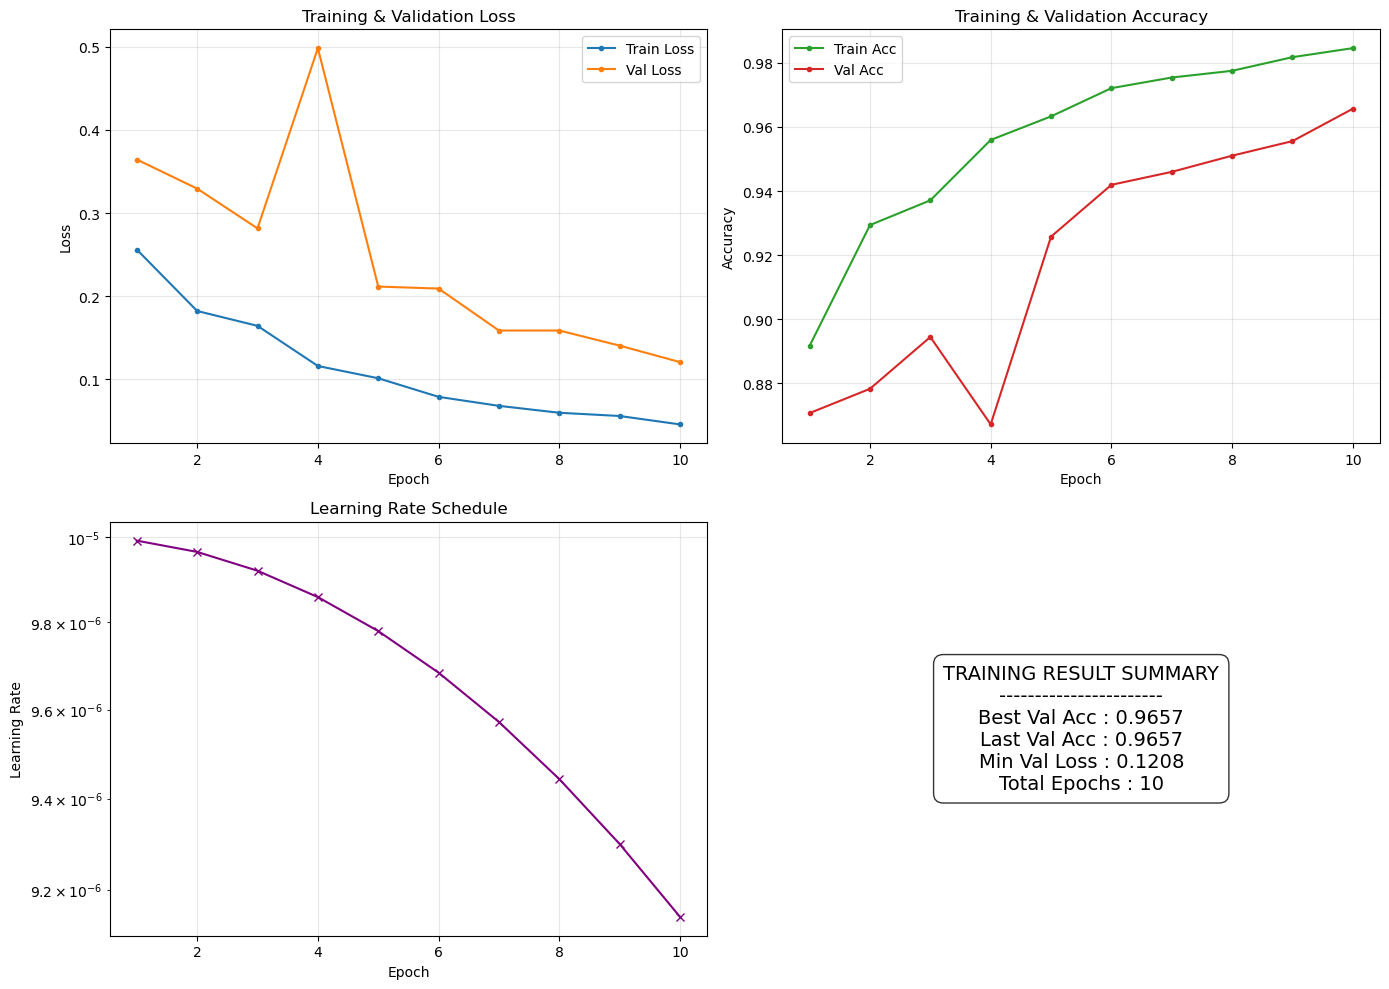

In [22]:
plot_training_history(hybrid_trainer.history, hybrid_cfg.LOG_DIR)

### Đánh giá mô hình - Evaluate


BẮT ĐẦU ĐÁNH GIÁ TRÊN TẬP TEST


Testing: 100%|██████████| 248/248 [00:39<00:00,  6.24it/s]



📊 KẾT QUẢ ĐÁNH GIÁ:
   Accuracy : 0.9692
   Precision: 1.0000
   Recall   : 0.9378
   F1 Score : 0.9679

📋 Chi tiết theo lớp:
              precision    recall  f1-score   support

        Real       0.94      1.00      0.97      2000
        Fake       1.00      0.94      0.97      1962

    accuracy                           0.97      3962
   macro avg       0.97      0.97      0.97      3962
weighted avg       0.97      0.97      0.97      3962

🔢 Đã lưu Confusion Matrix tại: ..\..\Outputs\efficientnet_fft\logs\evaluation_results\confusion_matrix.png


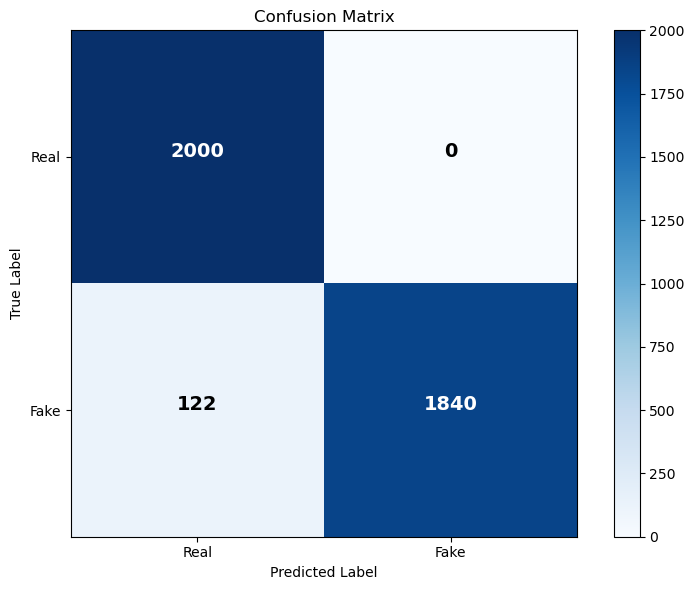

📉 Đã lưu ROC Curve tại: ..\..\Outputs\efficientnet_fft\logs\evaluation_results\roc_curve.png


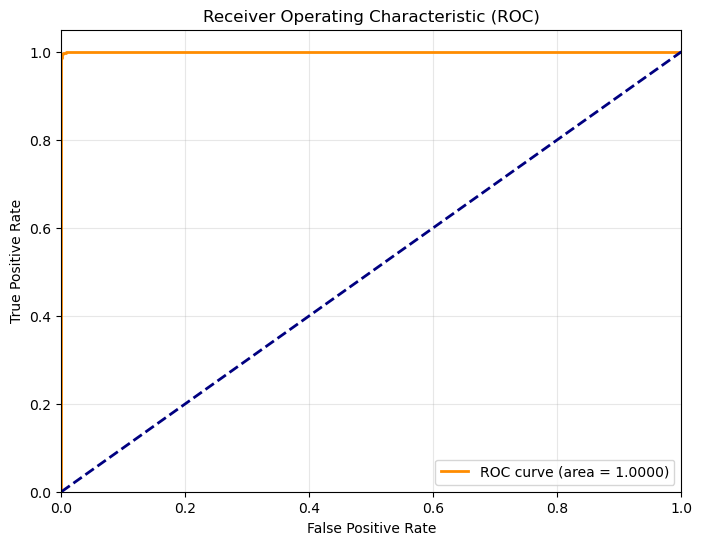

=== ROC AUC Score: 1.0000

Đã lưu toàn bộ kết quả đánh giá tại: ..\..\Outputs\efficientnet_fft\logs\evaluation_results


In [23]:
evaluate_test_set(hybrid_model, test_loader, hybrid_cfg.DEVICE, hybrid_cfg.LOG_DIR)